<a href="https://colab.research.google.com/github/sudip234-source/Time-Series-Analysis/blob/main/Seasonal_Decompose_%26_Adfuller_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

In [ ]:
drug = pd.read_csv('/content/AusAntidiabeticDrug.csv')
drug.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [ ]:
drug.set_index('ds',inplace=True)

In [ ]:
drug.head(2)

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891


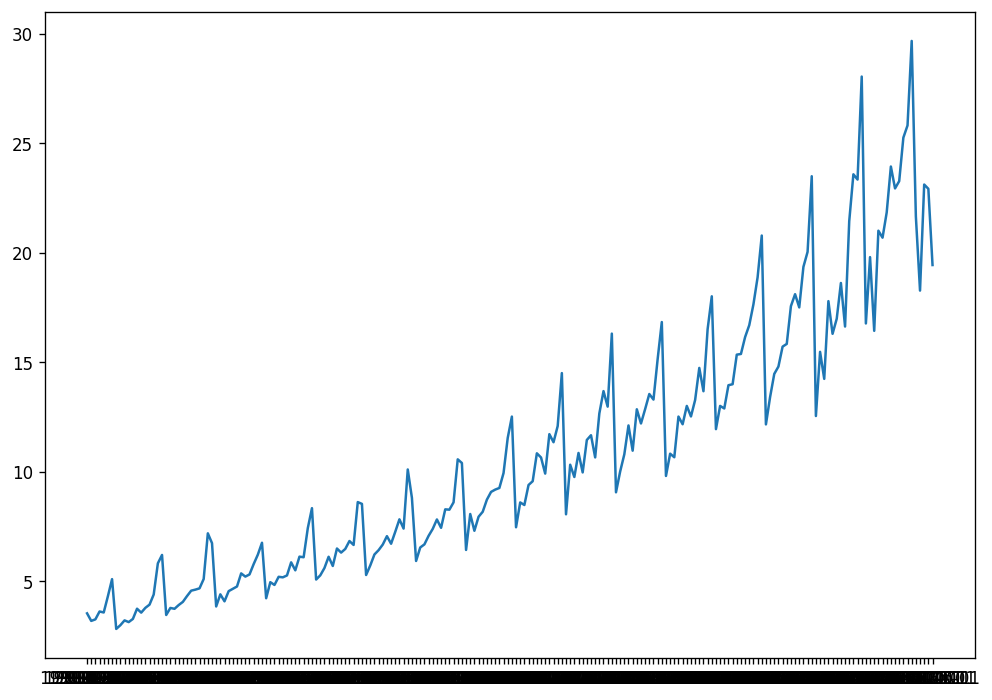

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})
plt.plot(drug.y)

Text(0.5, 1.0, 'Multiplicative Decomposition')

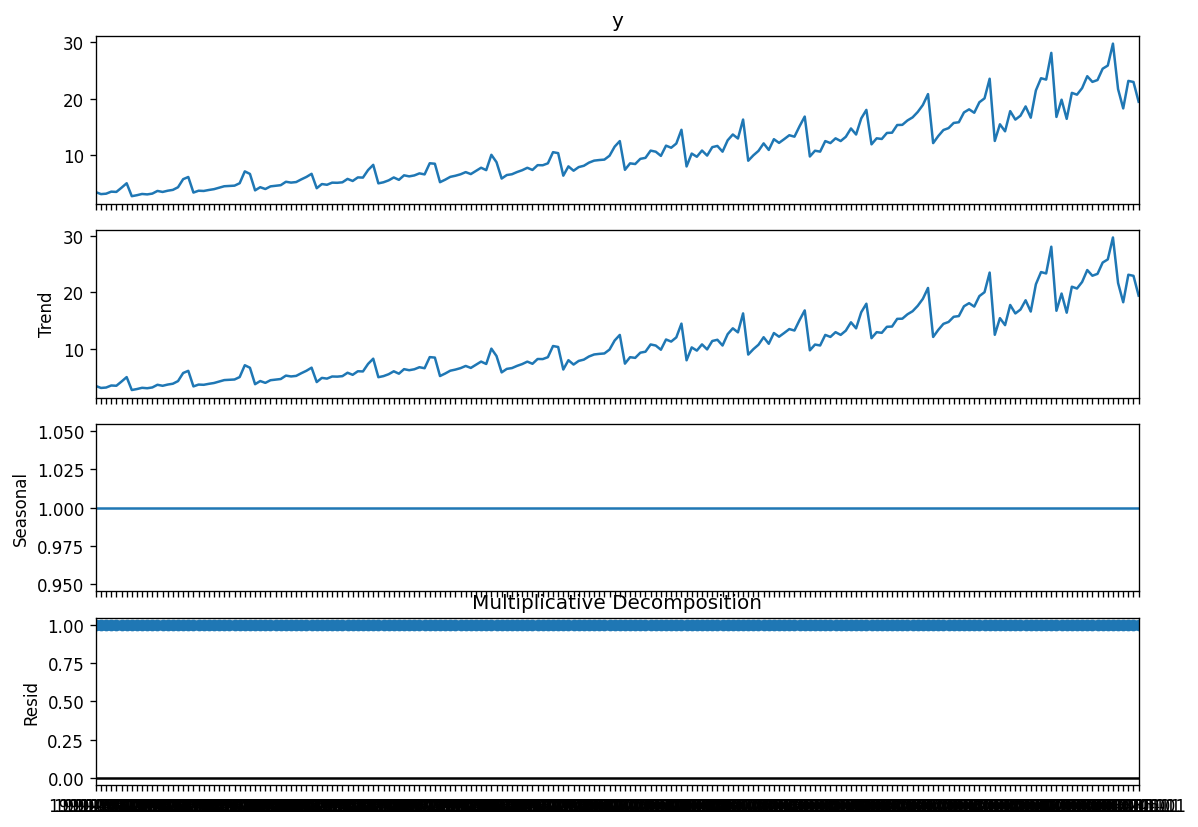

In [ ]:
# Multplicative Decomposition
mul_result= seasonal_decompose(drug.y, model='multiplicative',period=1, extrapolate_trend='freq')
mul_result.plot()
plt.title('Multiplicative Decomposition')

Text(0.5, 1.0, 'Additive Decomposition')

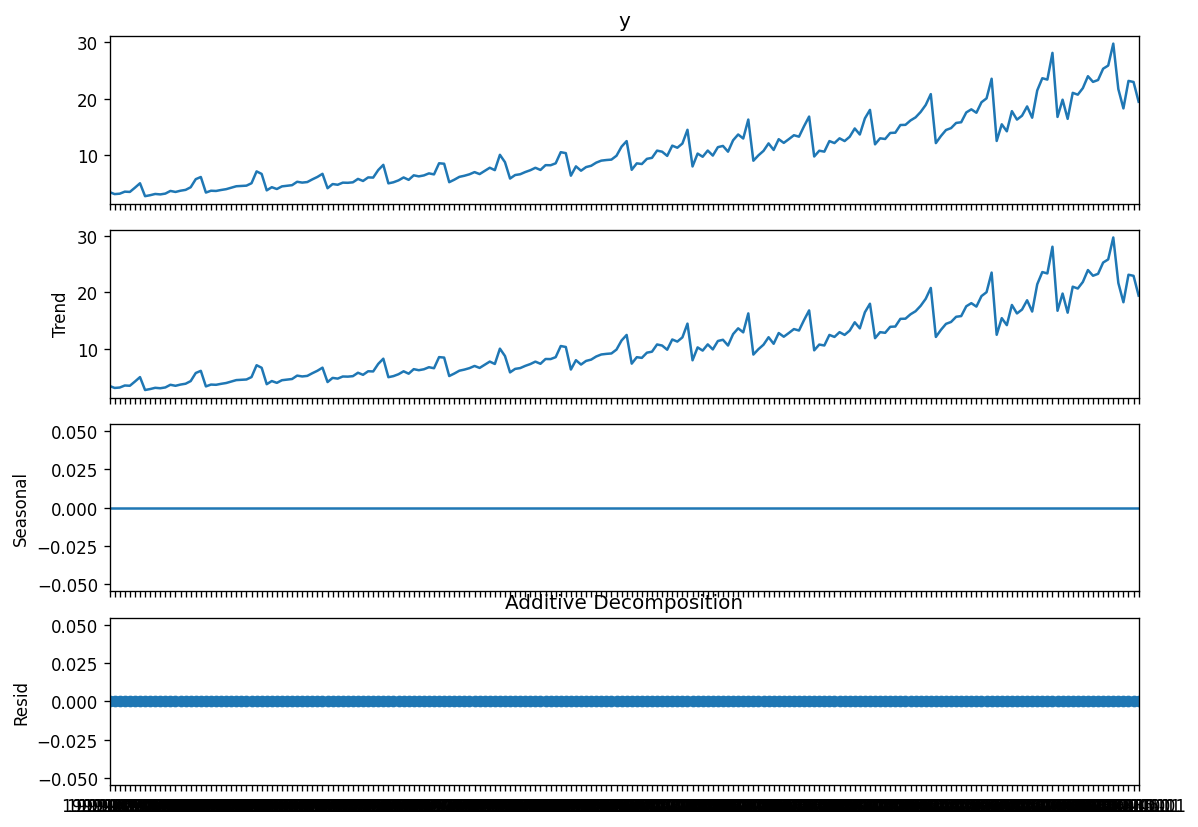

In [ ]:
add_result = seasonal_decompose(drug.y,model = 'additive',period=1)
add_result.plot()
plt.title('Additive Decomposition')

In [ ]:
df_add = pd.DataFrame({'seasonalty':add_result.seasonal,
                       'trend':add_result.trend,
                       'residual':add_result.resid,
                       'actual_values':add_result.observed})
df_add.head()

,seasonalty,trend,residual,actual_values
ds,,,,
1991-07-01,0.0,3.526591,0.0,3.526591
1991-08-01,0.0,3.180891,0.0,3.180891
1991-09-01,0.0,3.252221,0.0,3.252221
1991-10-01,0.0,3.611003,0.0,3.611003
1991-11-01,0.0,3.565869,0.0,3.565869


In [ ]:
df_mul = pd.DataFrame({'seasonalty':mul_result.seasonal,
                       'trend':mul_result.trend,
                       'residual':mul_result.resid,
                       'actual_values':mul_result.observed})
df_mul.head()

,seasonalty,trend,residual,actual_values
ds,,,,
1991-07-01,1.0,3.526591,1.0,3.526591
1991-08-01,1.0,3.180891,1.0,3.180891
1991-09-01,1.0,3.252221,1.0,3.252221
1991-10-01,1.0,3.611003,1.0,3.611003
1991-11-01,1.0,3.565869,1.0,3.565869


**ADFULLER** **TEST** for **STATIONARITY**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# null hypothesis - non stationary
# if p-value <0.05 : reject the null hypothesis

In [ ]:
adfuller_res = adfuller(drug.y.values,autolag='AIC')

print(f'ADF statistic : {adfuller_res[0]}')
print(f'p-value: {adfuller_res[1]}')
for key,value in adfuller_res[4].items():
  print('critical values : ')
  print(key,' ',value)

ADF statistic : 3.145185689306745
p-value: 1.0
critical values : 
1%   -3.465620397124192
critical values : 
5%   -2.8770397560752436
critical values : 
10%   -2.5750324547306476


So Adfuller Test also confirms that the time series is not stationary

### How a time series be made Stationary ?